In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import scipy
import seaborn as sns; sns.set()
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from pandas.tools.plotting import scatter_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Dengue

In [2]:
df = pd.read_csv("dengue.csv").dropna()
X = df[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']].values

#PCA
n_feat = 6

sc = StandardScaler()
X = sc.fit_transform(X)

pca_none = PCA(n_components=None)
X_none = pca_none.fit_transform(X)

EVR = pca_none.explained_variance_ratio_
CVR = []  #Cumulative Variance Ratio
counter = EVR[0]
for i in range(0,n_feat):
    if i > 0:
        counter += EVR[i]
    CVR.append(counter)
    
pca_2C = PCA(n_components=2)
newX = pca_2C.fit_transform(X)
XX = newX[:,0]
YY = newX[:,1]

C = pca_2C.components_  #Componentes

def Slope(A, B):
    return B/A

L = np.linspace(-3,3)
Levr = np.linspace(1, n_feat, len(EVR))
Lcvr = np.linspace(1, n_feat, len(EVR))

Explaided Variance Ratio = [0.5432399  0.17815102 0.1559858  0.08321381 0.02293603 0.01647344]


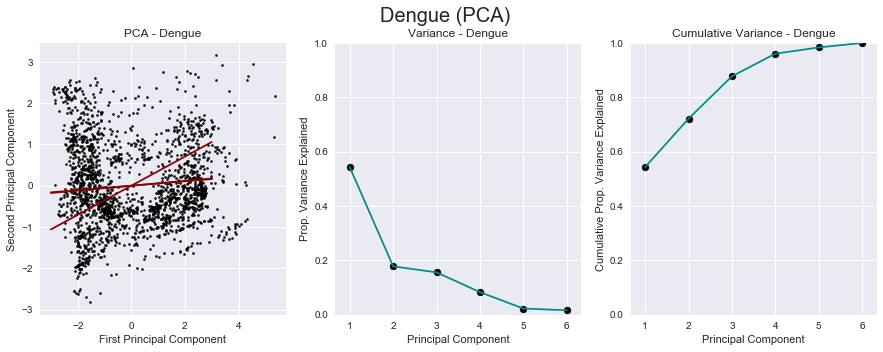

In [3]:
plt.figure(figsize=(15,5))

plt.suptitle("Dengue (PCA)", fontsize=20)
plt.subplot(1,3,1)
plt.title('PCA - Dengue')
plt.scatter(XX, YY, color = "black", s=5)
for i in range(0,3):
    plt.plot(L, Slope(C[0,i], C[1,i])*L, color = 'darkred')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.subplot(1,3,2)
plt.title('Variance - Dengue')
plt.plot(Levr, EVR, color="darkcyan")
plt.scatter(Levr, EVR, marker='o', color="black")
plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.ylim(0,1)

plt.subplot(1,3,3)
plt.title('Cumulative Variance - Dengue')
plt.plot(Lcvr, CVR, color="darkcyan")
plt.scatter(Lcvr, CVR, marker='o', color="black")
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.ylim(0,1)

print('Explaided Variance Ratio = '+str(EVR))

In [4]:
X = df[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']].values
mms = MinMaxScaler()
mms.fit(X)
Xtrans = mms.transform(X)

#K-Means
K=10
SSD = []
Acum = []
R = range(1,K,1)

C = 0
for i in R:
    km = KMeans(n_clusters=i).fit(Xtrans)
    SSD.append(km.inertia_)
    C+=km.inertia_
    Acum.append(C)

Optimal Cluster=2


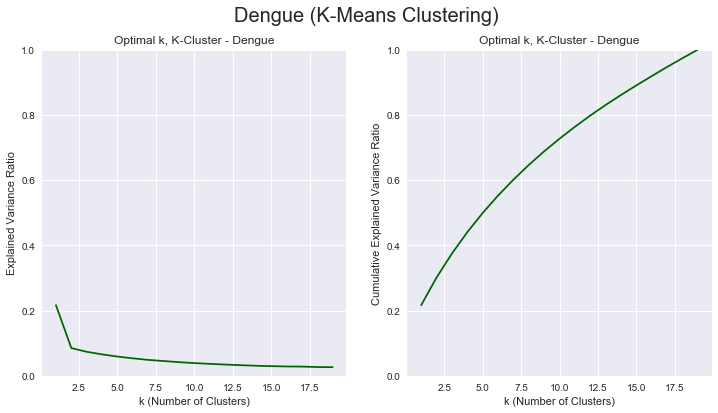

In [10]:
plt.figure(figsize=(12,6))
plt.suptitle("Dengue (K-Means Clustering)", fontsize=20)

plt.subplot(1,2,1)
plt.title("Optimal k, K-Cluster - Dengue")
plt.xlabel("k (Number of Clusters)")
plt.ylabel("Explained Variance Ratio")
plt.ylim(0,1)
plt.plot(R, SSD/np.sum(SSD), color="darkgreen")
plt.subplot(1,2,2)
plt.title("Optimal k, K-Cluster - Dengue")
plt.xlabel("k (Number of Clusters)")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.plot(R, Acum/np.sum(SSD), color="darkgreen")
plt.ylim(0,1)

print("Optimal Cluster=2")

# Bakery

In [6]:
#Preprocessing Data: Separando la fecha en: dia, mes, año y elimine de la hora la cantidad de segundos.
df = pd.read_csv("BreadBasket_DMS.csv").dropna()

D = []#"Day"
M = []#"Month"]
Y = []#"Year"]
H = []#"Hour"]
S = []#"Secs"]
Mn = []#"Minutes"]
T = [] #Transaction

for i in (df['Date'][1:]):
    K = i.split("-")
    D.append(K[2])
    M.append(K[1])
    Y.append(K[0])
    
for i in (df['Time'][1:]):
    K = i.split(':')
    H.append(K[0])
    Mn.append(K[1])
    S.append(K[2])

for i in (df['Transaction'][1:]):
    T.append(i)
    


C:\Users\CristianMB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype <U4 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\CristianMB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype <U4 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Explaided Variance Ratio = [0.33185829 0.1859788  0.16963203 0.1633437  0.14659287 0.0025943 ]


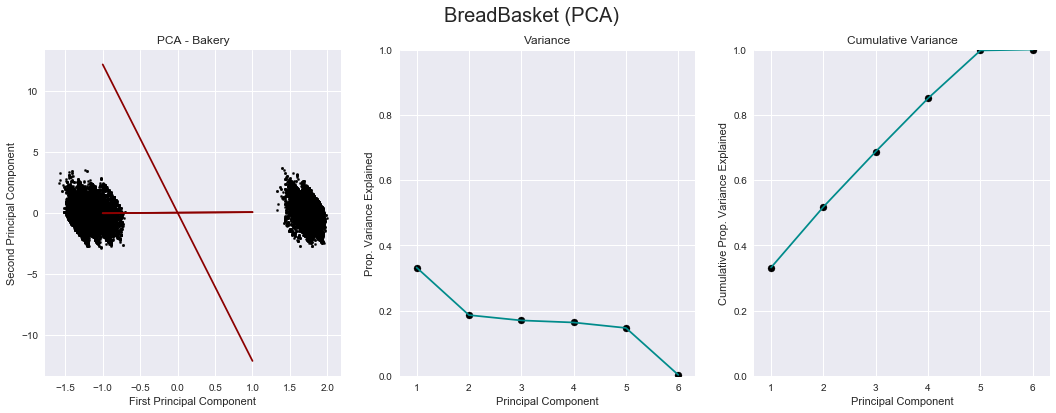

In [39]:
A = [D, M, Y, H, Mn, S]

#Set de datos procesado
X = np.transpose(np.array(A))
#PCA
n_feat = len(A)

sc = StandardScaler()
X = sc.fit_transform(X)

pca_none = PCA(n_components=None)
X_none = pca_none.fit_transform(X)

EVR = pca_none.explained_variance_ratio_
CVR = []  #Cumulative Variance Ratio
counter = EVR[0]
for i in range(0,n_feat):
    if i > 0:
        counter += EVR[i]
    CVR.append(counter)
    
pca_2C = PCA(n_components=2)
newX = pca_2C.fit_transform(X)
XX = newX[:,0]
YY = newX[:,1]

C = pca_2C.components_  #Componentes

def Slope(A, B):
    return B/A

L = np.linspace(-1,1)
Levr = np.linspace(1, n_feat, len(EVR))
Lcvr = np.linspace(1, n_feat, len(EVR))

plt.figure(figsize=(18,6))
plt.suptitle("BreadBasket (PCA)", fontsize=20)

plt.subplot(1,3,1)
plt.title('PCA - Bakery')
plt.scatter(XX, YY, color = "black", s=5)
for i in range(0,3):
    plt.plot(L, Slope(C[0,i], C[1,i])*L, color = 'darkred')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.subplot(1,3,2)
plt.title('Variance')
plt.plot(Levr, EVR, color="darkcyan")
plt.scatter(Levr, EVR, marker='o', color="black")
plt.xlabel('Principal Component')
plt.ylabel('Prop. Variance Explained')
plt.ylim(0,1)

plt.subplot(1,3,3)
plt.title('Cumulative Variance')
plt.plot(Lcvr, CVR, color="darkcyan")
plt.scatter(Lcvr, CVR, marker='o', color="black")
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.ylim(0,1)

print('Explaided Variance Ratio = '+str(EVR))

In [8]:
X = np.transpose(np.array([D, M,Mn, Y, H, S, T]))

mms = MinMaxScaler()
mms.fit(X)
Xtrans = mms.transform(X)

#K-Means
K=20
SSD = []
Acum = []
R = range(1,K,1)

C = 0
for i in R:
    km = KMeans(n_clusters=i).fit(Xtrans)
    SSD.append(km.inertia_)
    C+=km.inertia_
    Acum.append(C)

C:\Users\CristianMB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype <U4 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Optimal Cluster=2


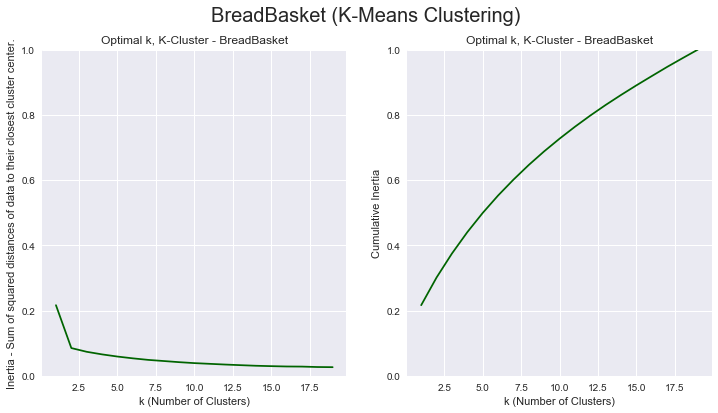

In [40]:
plt.figure(figsize=(12,6))
plt.suptitle("BreadBasket (K-Means Clustering)", fontsize=20)

plt.subplot(1,2,1)
plt.title("Optimal k, K-Cluster - BreadBasket")
plt.xlabel("k (Number of Clusters)")
plt.ylabel("Inertia - Sum of squared distances of data to their closest cluster center.")
plt.ylim(0,1)
plt.plot(R, SSD/np.sum(SSD), color="darkgreen")
plt.subplot(1,2,2)
plt.title("Optimal k, K-Cluster - BreadBasket")
plt.xlabel("k (Number of Clusters)")
plt.ylabel("Cumulative Inertia")
plt.plot(R, Acum/np.sum(SSD), color="darkgreen")
plt.ylim(0,1)


print("Optimal Cluster=2")